In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, RMSprop
from google.colab import files
uploaded = files.upload()
data_file = "MatchTimelinesFirst15.csv"
LOLdata = pd.read_csv(data_file, index_col= "matchId")
LOLdata = LOLdata.iloc[:,1:]
LOLdata.iloc[:,0]
all_no_outliers = LOLdata.copy()
all_no_outliers = all_no_outliers.loc[all_no_outliers['blueChampKills'] 
                                        <= np.quantile(all_no_outliers['blueChampKills'],q=0.99)]
all_no_outliers = all_no_outliers.loc[all_no_outliers['redChampKills'] 
                                        <= np.quantile(all_no_outliers['redChampKills'],q=0.99)]
names = all_no_outliers.columns
y = np.array(all_no_outliers.iloc[:, 0])

for attribute in all_no_outliers.columns:
    min = all_no_outliers[attribute].min()
    max = all_no_outliers[attribute].max()
    divider = max - min
    all_no_outliers[attribute] = ((all_no_outliers[attribute]-min)/divider)
    
X = np.array(all_no_outliers.iloc[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_no_outliers.iloc[:, 1:], all_no_outliers.iloc[:, 0], test_size=0.33)
y_train3 = np.asarray(y_train2).astype('float32').reshape((-1,1))
y_test3 = np.asarray(y_test2).astype('float32').reshape((-1,1))
print(X.shape)
print(y_train3)

Saving MatchTimelinesFirst15.csv to MatchTimelinesFirst15.csv
(47908, 14)
[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


One layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


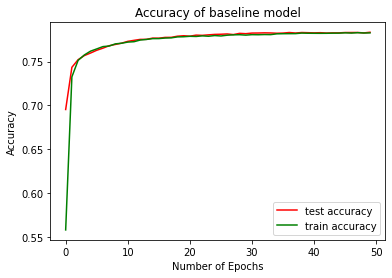

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

Train loss: 0.4505
Train accuracy: 0.7829


In [ ]:
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

Test loss: 0.4539
Test accuracy: 0.7834


In [ ]:
output_weights = outlayer.get_weights()
arr = np.array(output_weights[0])
w = np.transpose(arr)
weights_per_label_long  = w.tolist()
w.shape

(1, 14)

One layer at different batches

batch_size = 64/128

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4579
Train accuracy: 0.7811
Test loss: 0.4568
Test accuracy: 0.7786


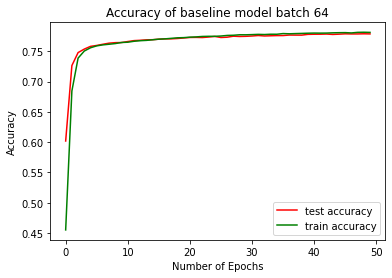

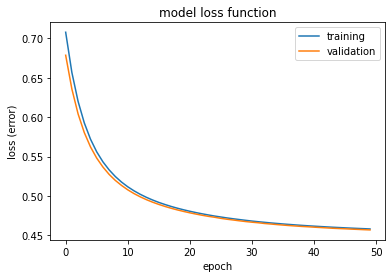

In [4]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, batch_size=64, epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model batch 64")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4696
Train accuracy: 0.7767
Test loss: 0.4689
Test accuracy: 0.7743


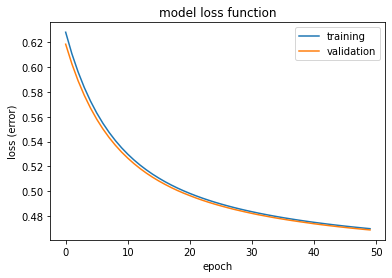

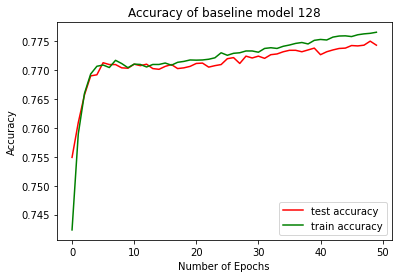

In [13]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, batch_size=128, epochs=50, verbose=False, validation_data=(X_test2, y_test3))
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model 128")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4508
Train accuracy: 0.7831
Test loss: 0.4497
Test accuracy: 0.7808


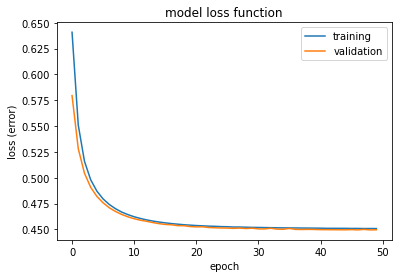

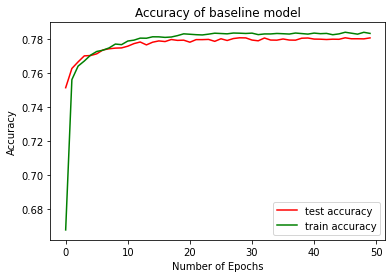

In [6]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, batch_size=16, epochs=50, verbose=False, validation_data=(X_test2, y_test3))
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4505
Train accuracy: 0.7835
Test loss: 0.4496
Test accuracy: 0.7806


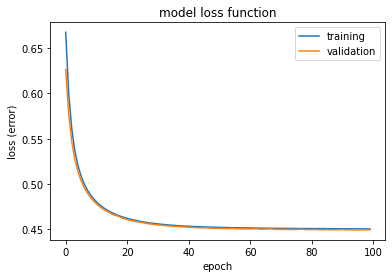

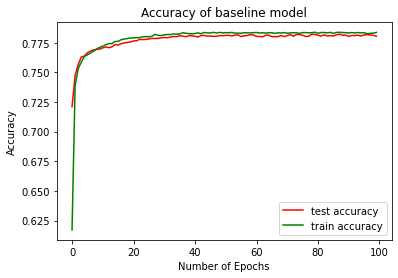

In [7]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=100, verbose=False, validation_data=(X_test2, y_test3))
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4494
Train accuracy: 0.7836
Test loss: 0.4484
Test accuracy: 0.7813


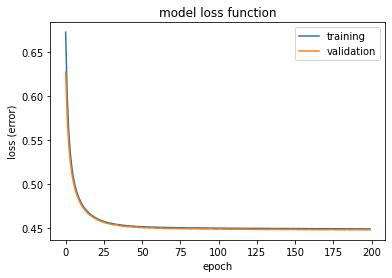

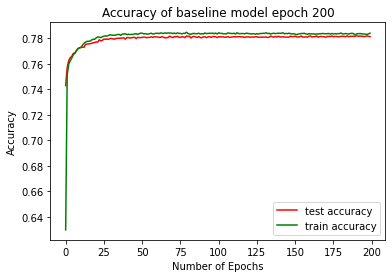

In [12]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=200, verbose=False, validation_data=(X_test2, y_test3))
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model epoch 200")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train loss: 0.4594
Train accuracy: 0.7796
Test loss: 0.4588
Test accuracy: 0.7786


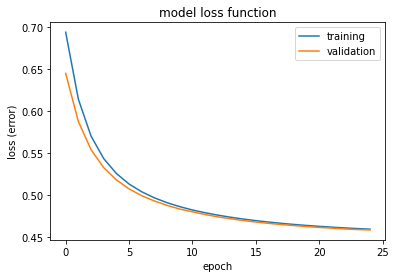

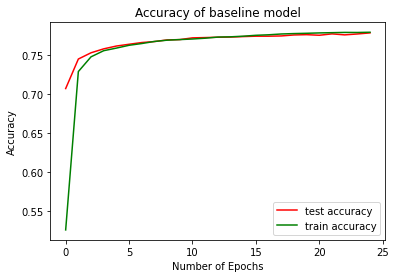

In [10]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=25, verbose=False, validation_data=(X_test2, y_test3))
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Try find the best optimizers

In [ ]:
output_weights = outlayer.get_weights()
arr = np.array(output_weights[0])
w = np.transpose(arr)
weights_per_label = w.tolist()

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=100, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

Train loss: 0.4482
Train accuracy: 0.7839


Test loss: 0.4515
Test accuracy: 0.7836


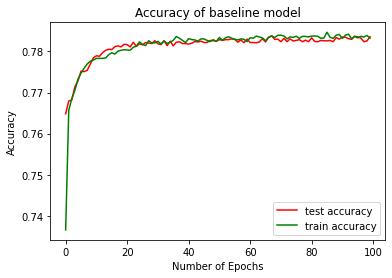

In [ ]:
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
output_weights = outlayer.get_weights()
arr = np.array(output_weights[0])
w = np.transpose(arr)
weights_per_label_long  = w.tolist()
w.shape

(1, 14)

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=100, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

Train loss: 0.4487
Train accuracy: 0.7832


Test loss: 0.4519
Test accuracy: 0.7826


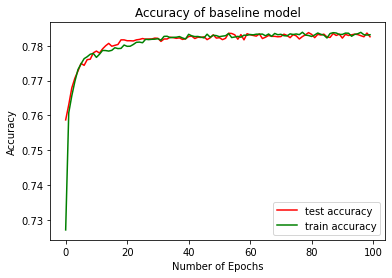

In [ ]:
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4476
Train accuracy: 0.7827
Test loss: 0.4511
Test accuracy: 0.7834


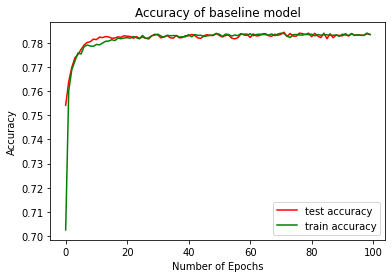

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0015, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4481
Train accuracy: 0.7839
Test loss: 0.451
Test accuracy: 0.7822


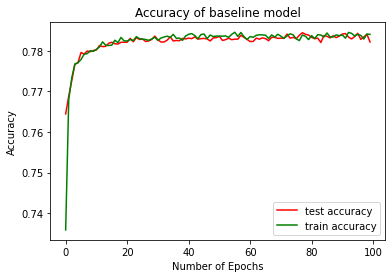

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4473
Train accuracy: 0.7832
Test loss: 0.4508
Test accuracy: 0.7838


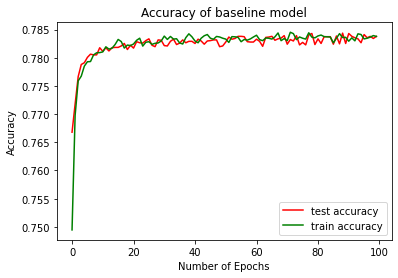

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4468
Train accuracy: 0.7841
Test loss: 0.4501
Test accuracy: 0.7838


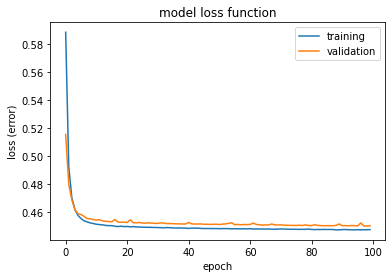

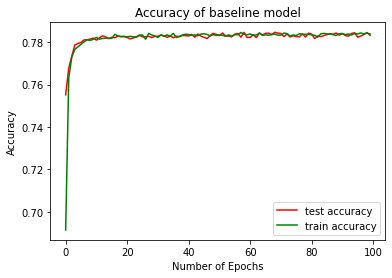

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0030, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4487
Train accuracy: 0.7844
Test loss: 0.4476
Test accuracy: 0.7824


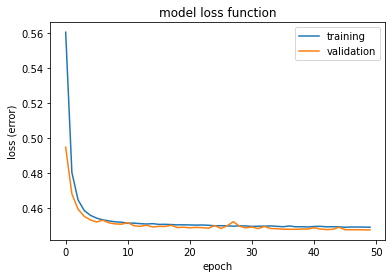

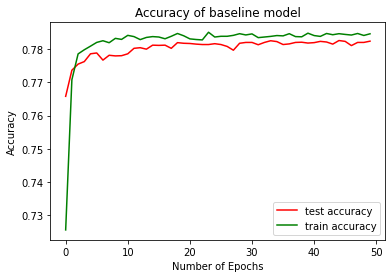

In [14]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0035, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4492
Train accuracy: 0.7827
Test loss: 0.4522
Test accuracy: 0.7825


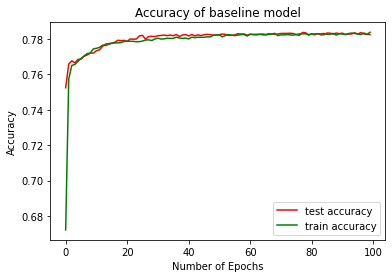

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid', input_shape=(14,))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=50, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()

loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Add 1 hidden layer

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 120       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4511
Train accuracy: 0.7815
Test loss: 0.4548
Test accuracy: 0.7813


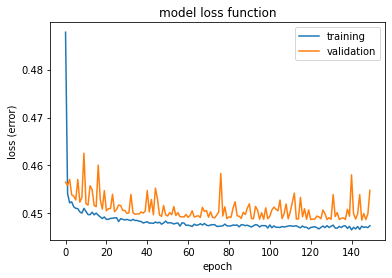

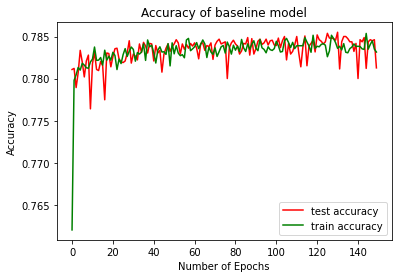

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(8, input_shape=(14,)))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=150, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                240       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4497
Train accuracy: 0.7828
Test loss: 0.4516
Test accuracy: 0.7826


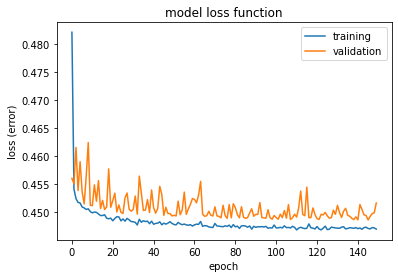

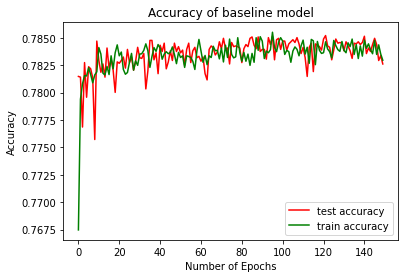

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(16, input_shape=(14,)))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=150, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 60        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.446
Train accuracy: 0.7843
Test loss: 0.4488
Test accuracy: 0.7847


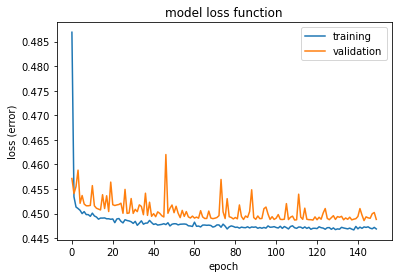

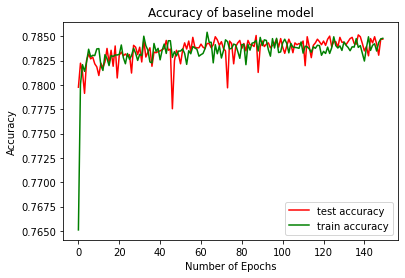

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=150, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4)                 60        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_39 (Dense)            (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train loss: 0.4479
Train accuracy: 0.785
Test loss: 0.4484
Test accuracy: 0.7824


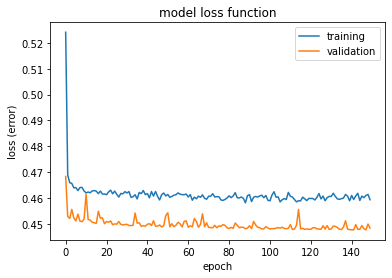

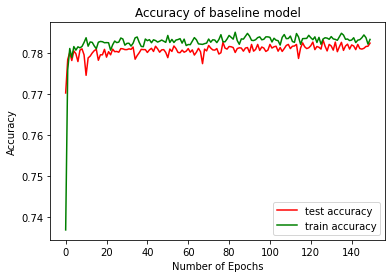

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,epochs=150, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

2 hidden layers

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 60        
                                                                 
 dense_16 (Dense)            (None, 8)                 40        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.6917
Test accuracy: 0.5778


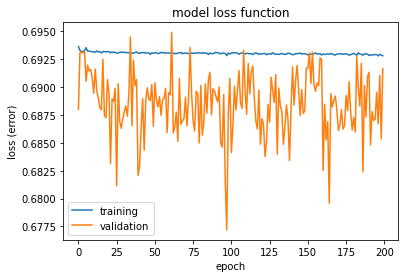

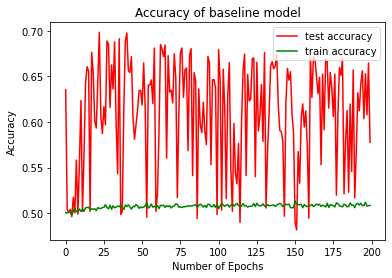

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train, epochs=200, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 60        
                                                                 
 dense_19 (Dense)            (None, 16)                80        
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4503
Test accuracy: 0.7846


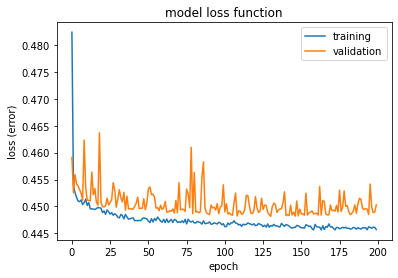

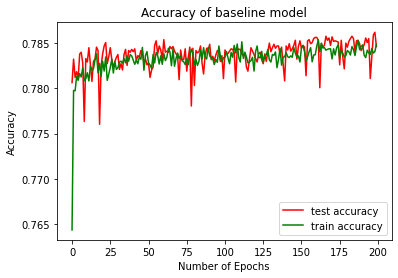

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=200, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 4)                 60        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4503
Test accuracy: 0.7853


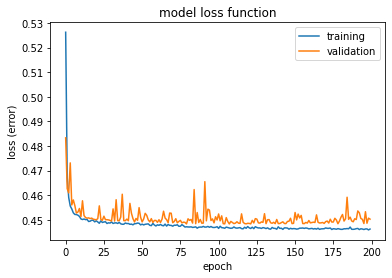

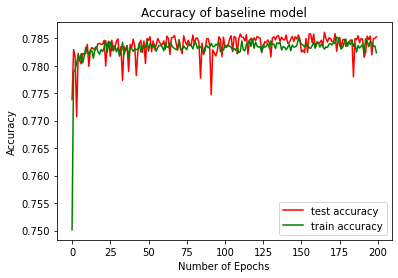

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
#model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=200, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 60        
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_41 (Dense)            (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4496
Test accuracy: 0.7811


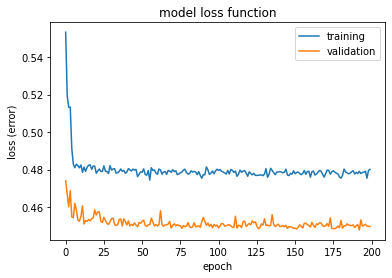

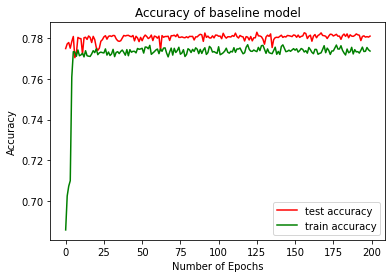

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=200, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4)                 60        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4656
Test accuracy: 0.7813


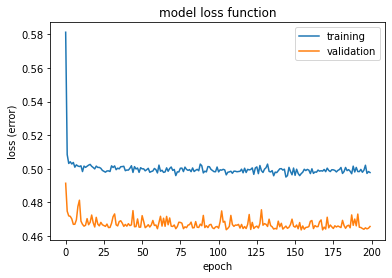

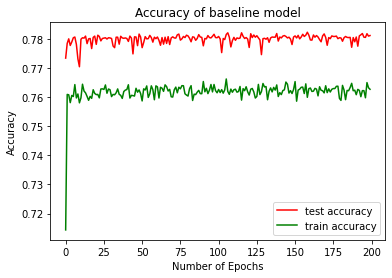

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=200, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 60        
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


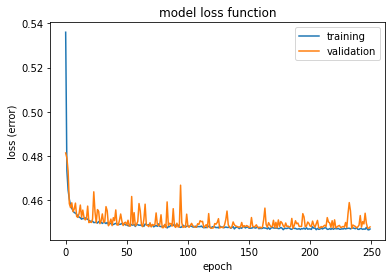

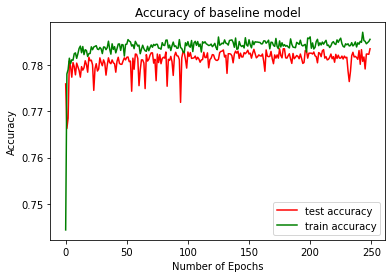

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=250, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Train loss: 0.4458
Train accuracy: 0.7856
Test loss: 0.448
Test accuracy: 0.7835


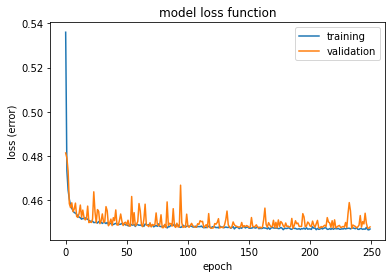

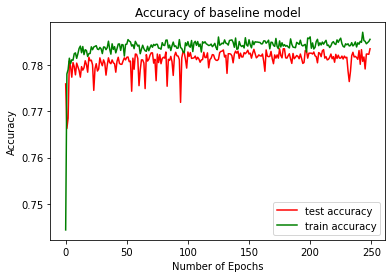

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 4)                 60        
                                                                 
 dense_53 (Dense)            (None, 4)                 20        
                                                                 
 dense_54 (Dense)            (None, 8)                 40        
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


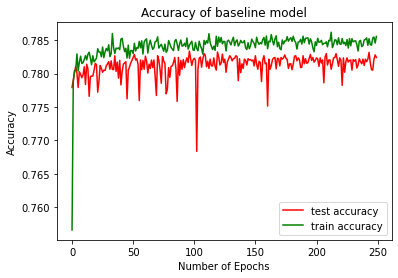

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3, epochs=250, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Train loss: 0.4456
Train accuracy: 0.7855
Test loss: 0.4477
Test accuracy: 0.7824


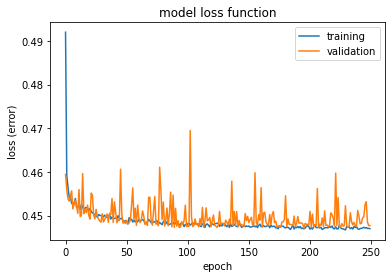

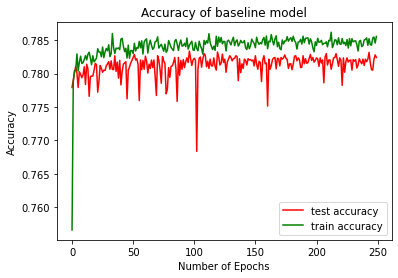

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 4)                 60        
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 16)                80        
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


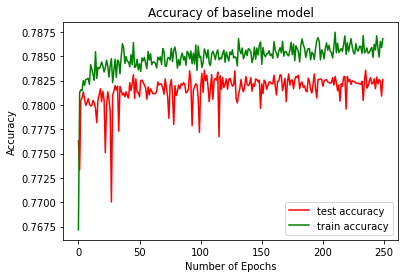

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=250, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Train loss: 0.4478
Train accuracy: 0.7868
Test loss: 0.4494
Test accuracy: 0.7826


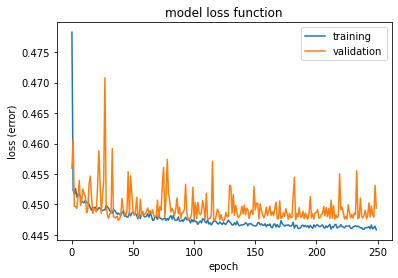

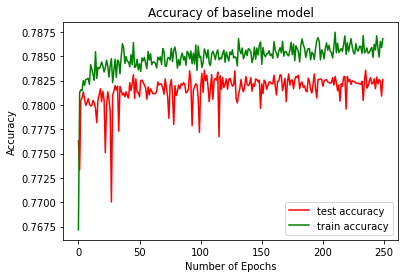

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 4)                 60        
                                                                 
 dense_61 (Dense)            (None, 4)                 20        
                                                                 
 dense_62 (Dense)            (None, 4)                 20        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_59 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


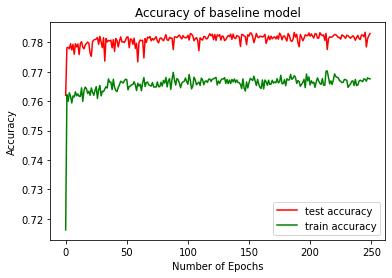

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=250, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Train loss: 0.4475
Train accuracy: 0.786
Test loss: 0.4493
Test accuracy: 0.783


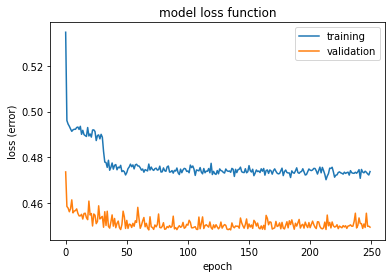

In [ ]:
loss, accuracy  = model.evaluate(X_train2, y_train3, verbose=False)
print(f'Train loss: {loss:.4}')
print(f'Train accuracy: {accuracy:.4}')

loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 4)                 60        
                                                                 
 dropout_6 (Dropout)         (None, 4)                 0         
                                                                 
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_63 (Dense)            (None, 1)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


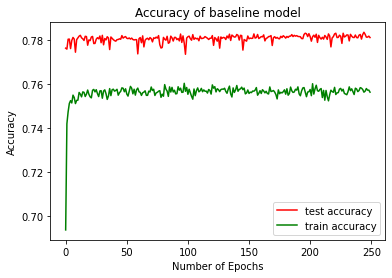

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=250, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 60        
                                                                 
 dense_69 (Dense)            (None, 4)                 20        
                                                                 
 dense_70 (Dense)            (None, 4)                 20        
                                                                 
 dense_71 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 1)                 5         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4493
Test accuracy: 0.7812


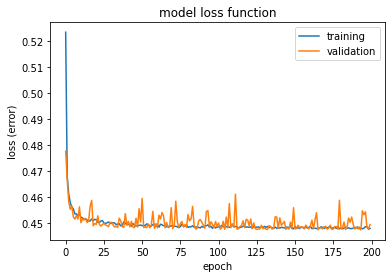

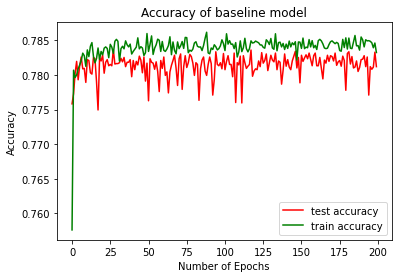

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=300, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 4)                 60        
                                                                 
 dense_80 (Dense)            (None, 4)                 20        
                                                                 
 dense_81 (Dense)            (None, 4)                 20        
                                                                 
 dense_82 (Dense)            (None, 4)                 20        
                                                                 
 dense_83 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 1)                 5         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4482
Test accuracy: 0.7832


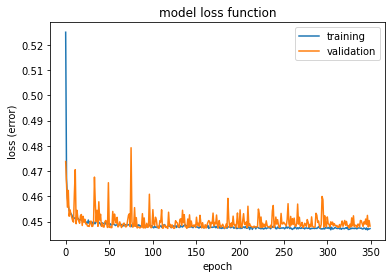

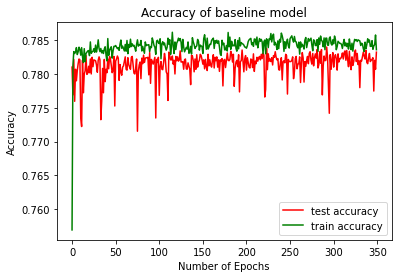

In [ ]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=350, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 60        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4487
Test accuracy: 0.781


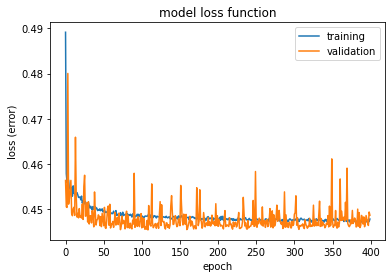

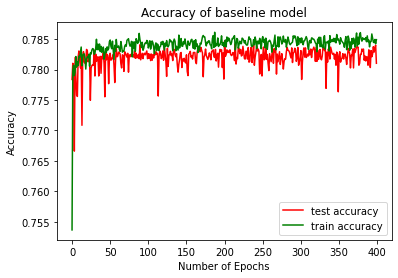

In [16]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=400, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 4)                 60        
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 4)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Test loss: 0.4467
Test accuracy: 0.7819


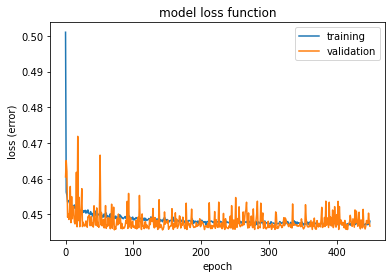

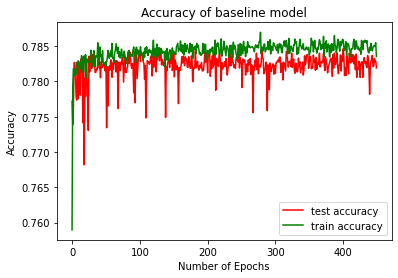

In [18]:
model = Sequential()
outlayer = Dense(1, activation='sigmoid')
model.add(Dense(4, input_shape=(14,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(outlayer)
model.summary()
optimizer = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train2, y_train3,  epochs=450, verbose=False, validation_data=(X_test2, y_test3))
history.history.keys()
loss, accuracy  = model.evaluate(X_test2, y_test3, verbose=False)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
plt.plot(history.history['val_accuracy'], color='r', label="test accuracy")
plt.plot(history.history['accuracy'], color='g', label="train accuracy")

plt.title("Accuracy of baseline model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()